In [1]:
#Import libraries and packages
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as st

In [2]:
#Import data
df=pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
#Create dummy variables
df = df.drop(columns='Name')
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [4]:
#Descriptive statistics
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000,887.000000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542,0.645998
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204,0.478480
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920,1.000000


<Axes: xlabel='Pclass', ylabel='Survived'>

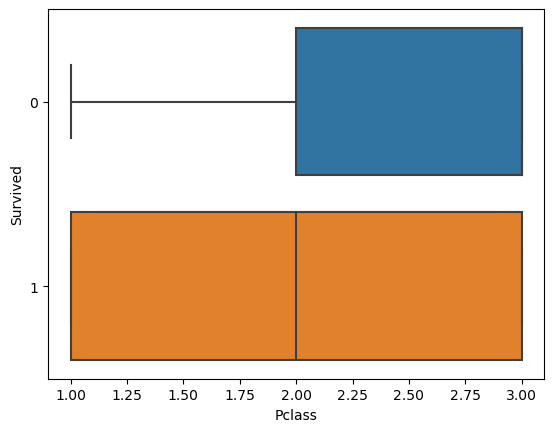

In [5]:
#Data distribution
sns.boxplot(data=df, y='Survived', x='Pclass', orient='horizontal')

<Axes: xlabel='Age', ylabel='Survived'>

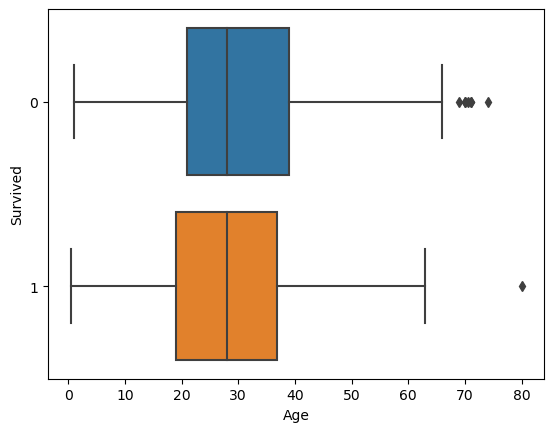

In [6]:
sns.boxplot(data=df, y='Survived', x='Age', orient='horizontal')

<Axes: >

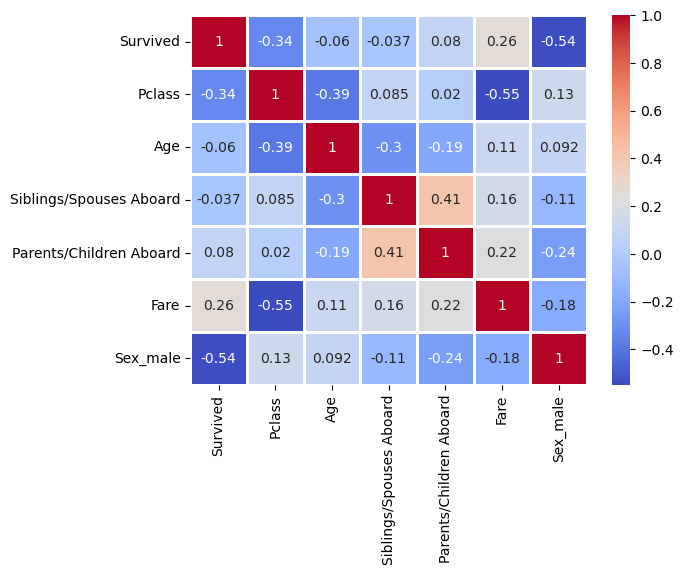

In [7]:
#Data correlation
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linecolor='white', linewidths=1)

In [8]:
#Assign values
y = df['Survived']
x = df.drop(columns='Survived')
x = st.add_constant(x)

In [9]:
#Training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1502)

In [10]:
#Logistics regression
model = st.Logit(y_train, x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.405125
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  709
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            6
Date:                Wed, 12 Jun 2024   Pseudo R-squ.:                  0.3915
Time:                        12:41:20   Log-Likelihood:                -287.23
converged:                       True   LL-Null:                       -472.06
Covariance Type:            nonrobust   LLR p-value:                 9.247e-77
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       6.2418      0.686      9.101      0.000       4.898   

In [11]:
#logistics coefficient reader
def logistics_reader(coef):
    probability = round((np.exp(coef)-1)*100,2)
    if probability > 0:
        print('The likelihood increases by', probability, '%')
    elif probability == 0:
        print('No impact')
    else:
        print('The likelihood decreases by', abs(probability), '%')

In [12]:
logistics_reader(-1.3071)

The likelihood decreases by 72.94 %


In [13]:
#Predictions
y_pred = model.predict(x_test)
y_pred = np.where(y_pred>0.5, 1, 0)

In [14]:
#Model assessment
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       108
           1       0.65      0.63      0.64        70

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178

